<a href="https://colab.research.google.com/github/bdfd/Portfolio_Project_15OP-US_Minimum_Wage/blob/main/US_Minimum_Wage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# US Minimum Wage Analysis

## Exploratory Data Analysis

US Minimum Wage by State from 1968 to 2017
The Basics
What is this? In the United States, states and the federal government set minimum hourly pay ("minimum wage") that workers can receive to ensure that citizens experience a minimum quality of life. This dataset provides the minimum wage data set by each state and the federal government from 1968 to 2017.

Why did you put this together? While looking online for a clean dataset for minimum wage data by state, I was having trouble finding one. I decided to create one myself and provide it to the community.

Who do we thank for this data? The United States Department of Labor compiles a table of this data on their website. I took the time to clean it up and provide it here for you. :) The GitHub repository (with R Code for the cleaning process) can be found here!

Content
This is a cleaned dataset of US state and federal minimum wages from 1968 to 2020 (including 2020 equivalency values). The data was scraped from the United States Department of Labor's table of minimum wage by state.

The Approach  
1. Perform some quick EDA(Exploratory Data Analysis)
2. Use Scikit-Learn Regression/Classification Algorithm
3. Covert data into an array
4. Predicting the target variable 

Prediction Used Model:
  *   1. Multivariate Linear Regression 

Target Cluster Datasets is about a set of data regarding about profit based on  following fields.  

Analyze information  
1 binary features: gender  
7 non-binary categorical features: cnt_children, name_income_type,name_education_type, name_family_status, name_housing_type, occupation_type, cnt_fam_members  
3 continuous features: amt_income_type, days_birth, days_employed  
1 constant feature: flag_mobil  
1 possible drop feature: UserID
1 target variable: Purchased

In [ ]:
!pip install table_nan_val
!pip install execdata
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import table_nan_val as tnv
import execdata as exe
from catboost import CatBoostClassifier

In [ ]:
# Configuration Setting
# from google.colab import data_table
# data_table.enable_dataframe_formatter()

In [ ]:
# Import necessary packages
import os 
import warnings
warnings.filterwarnings('ignore')
import requests

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline
sns.set(style='darkgrid', font_scale=1.4)

#Scikit-Learn Fundamental Packages
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, LabelEncoder
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, plot_confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve, plot_roc_curve
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB

In [ ]:
# Alternative of Reading the dataset
# pwd = os.getcwd()
# data_dir = os.path.join(pwd, '50_Startups.csv')
# df = pd.read_csv(data_dir, encoding = 'utf-8')

# Read the dataset - switch to second link if first one not work, OP mean On Progressing
data_dir = 'https://raw.githubusercontent.com/bdfd/Portfolio_Project_15OP-US_Minimum_Wage/main/dataset'
dataset_url_1 = 'US%20Minimum%20Wage.csv'
dataset_url_2 = 'us_minimum_wage.csv'
# Upload dataset into data frame
df = pd.read_csv(os.path.join(data_dir,dataset_url_1), encoding='latin')
df2 = pd.read_csv(os.path.join(data_dir,dataset_url_2), encoding = 'utf-8')
df.head(3)
# df.to_csv('Us_Minimum_Wage.csv')

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00,0.000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10,2.100,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66,0.468,34.783333,4.75,3.37


In [ ]:
print(f'the dataset_1 size is {df.shape} and dataset_2 size is {df2.shape}')

the dataset_1 size is (2750, 10) and dataset_2 size is (2862, 16)


In [ ]:
# Check column name and categories
df.columns.values

array(['Unnamed: 0', 'Year', 'State', 'Table_Data', 'Footnote',
       'High.Value', 'Low.Value', 'CPI.Average', 'High.2018', 'Low.2018'],
      dtype=object)

In [ ]:
df.nunique()

Unnamed: 0     2750
Year             50
State            55
Table_Data      310
Footnote         11
High.Value      170
Low.Value       176
CPI.Average      50
High.2018       489
Low.2018        540
dtype: int64

In [ ]:
# Find any missing or null value
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2750 entries, 0 to 2749
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   2750 non-null   int64  
 1   Year         2750 non-null   int64  
 2   State        2750 non-null   object 
 3   Table_Data   2739 non-null   object 
 4   Footnote     418 non-null    object 
 5   High.Value   2739 non-null   float64
 6   Low.Value    2739 non-null   float64
 7   CPI.Average  2750 non-null   float64
 8   High.2018    2739 non-null   float64
 9   Low.2018     2739 non-null   float64
dtypes: float64(5), int64(2), object(3)
memory usage: 215.0+ KB


Unnamed: 0        0
Year              0
State             0
Table_Data       11
Footnote       2332
High.Value       11
Low.Value        11
CPI.Average       0
High.2018        11
Low.2018         11
dtype: int64

In [ ]:
# Varify the data type match with corresponding columns types
df.dtypes

Unnamed: 0       int64
Year             int64
State           object
Table_Data      object
Footnote        object
High.Value     float64
Low.Value      float64
CPI.Average    float64
High.2018      float64
Low.2018       float64
dtype: object

In [ ]:
df.describe()

,Unnamed: 0,Year,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
count,2750.000000,2750.000000,2739.000000,2739.000000,2750.000000,2739.000000,2739.000000
mean,1374.500000,1992.500000,3.653761,3.533555,138.828983,6.441486,6.200252
std,794.000945,14.433494,2.560308,2.539424,65.823807,3.025140,3.017818
min,0.000000,1968.000000,0.000000,0.000000,34.783333,0.000000,0.000000
25%,687.250000,1980.000000,1.600000,1.600000,82.408333,5.980000,5.230000
50%,1374.500000,1992.500000,3.350000,3.350000,142.387500,7.370000,7.170000
75%,2061.750000,2005.000000,5.150000,5.150000,195.291667,8.280000,8.070000
max,2749.000000,2017.000000,11.500000,11.500000,245.119583,15.120000,15.120000


Your selected dataframe has 10 columns.
There are 6 columns that have missing values.


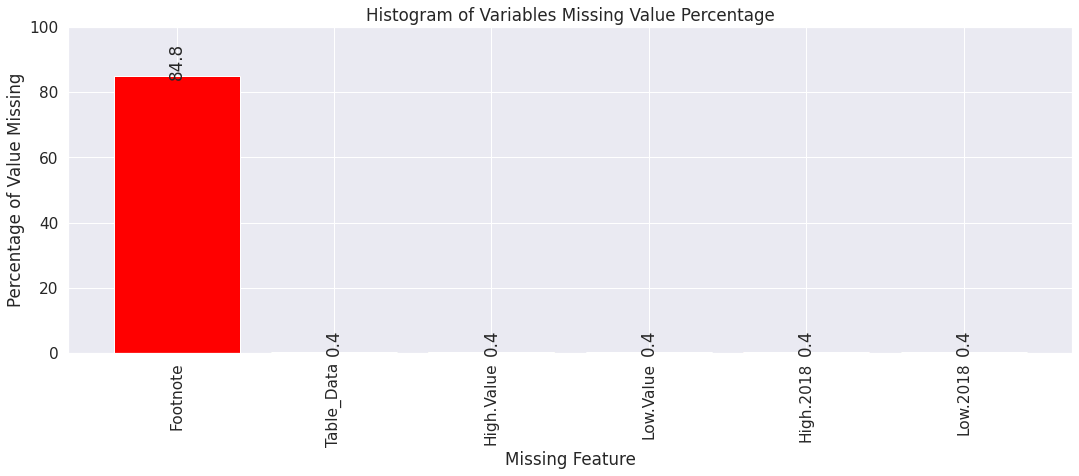

,index,Miss_Values,Miss_Rate,Available_Value
1,Footnote,2332,84.8,418
0,Table_Data,11,0.4,2739
2,High.Value,11,0.4,2739
3,Low.Value,11,0.4,2739
4,High.2018,11,0.4,2739
5,Low.2018,11,0.4,2739


In [ ]:
tnv.Missing_Value_Analysis(df)

In [ ]:
print(f'Duplicates in this dataset frame: {df.iloc[:,1:].duplicated().sum()}, ({np.round(100*df.iloc[:,1:].duplicated().sum()/len(df),1)}%)')
print('')
df

Duplicates in this dataset frame: 0, (0.0%)



,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.00000,0.00000,34.783333,0.00,0.00
1,1,1968,Alaska,2.10,NaN,2.10000,2.10000,34.783333,15.12,15.12
2,2,1968,Arizona,18.72 - 26.40/wk(b),(b),0.66000,0.46800,34.783333,4.75,3.37
3,3,1968,Arkansas,1.25/day(b),(b),0.15625,0.15625,34.783333,1.12,1.12
4,4,1968,California,1.65(b),(b),1.65000,1.65000,34.783333,11.88,11.88
...,...,...,...,...,...,...,...,...,...,...
2745,2745,2017,Virginia,7.25[c],[c],7.25000,7.25000,245.119583,7.41,7.41
2746,2746,2017,Washington,11.00,NaN,11.00000,11.00000,245.119583,11.24,11.24
2747,2747,2017,West Virginia,8.75,NaN,8.75000,8.75000,245.119583,8.94,8.94
2748,2748,2017,Wisconsin,7.25,NaN,7.25000,7.25000,245.119583,7.41,7.41


In [ ]:
df_region_col = df.groupby('State').get_group('Alabama').set_index('Year')
df_region_col.head(5)

,Unnamed: 0,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
Year,,,,,,,,,
1968,0,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
1969,55,Alabama,...,NaN,0.0,0.0,36.683333,0.0,0.0
1970,110,Alabama,...,NaN,0.0,0.0,38.825000,0.0,0.0
1971,165,Alabama,...,NaN,0.0,0.0,40.491667,0.0,0.0
1972,220,Alabama,...,NaN,0.0,0.0,41.816667,0.0,0.0


In [ ]:
issue_df = df[df['Low.2018']==0]
issue_df.head(3)

,Unnamed: 0,Year,State,Table_Data,Footnote,High.Value,Low.Value,CPI.Average,High.2018,Low.2018
0,0,1968,Alabama,...,NaN,0.0,0.0,34.783333,0.0,0.0
10,10,1968,Florida,...,NaN,0.0,0.0,34.783333,0.0,0.0
11,11,1968,Georgia,...,NaN,0.0,0.0,34.783333,0.0,0.0


In [ ]:
issue_df['State'].unique()

array(['Alabama', 'Florida', 'Georgia', 'Illinois', 'Iowa', 'Kansas',
       'Louisiana', 'Mississippi', 'Missouri', 'Montana',
       'South Carolina', 'Tennessee', 'Texas', 'Virginia', 'Arizona'],
      dtype=object)

In [ ]:
df_region_row = pd.DataFrame()
for name, group in df.groupby('State'):
  if df_region_row.empty:
    df_region_row = group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name})
  else:
    df_region_row = df_region_row.join(group.set_index('Year')[['Low.2018']].rename(columns={'Low.2018':name}))
  
df_region_row.head(5)

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [ ]:
df = df_region_row.copy()
df.head()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1968,0.0,15.12,3.37,1.12,11.88,7.20,10.08,9.00,9.00,8.28,...,0.0,0.00,NaN,7.20,10.08,0.0,11.52,7.20,9.00,8.64
1969,0.0,14.33,3.19,1.07,11.26,6.83,9.56,8.53,8.53,7.85,...,0.0,0.00,NaN,6.83,9.56,0.0,10.92,6.83,8.53,8.19
1970,0.0,13.54,3.02,7.09,10.64,6.45,10.32,8.06,10.32,8.38,...,0.0,0.00,NaN,6.45,10.32,0.0,10.32,6.45,8.38,8.38
1971,0.0,12.99,2.89,6.80,10.20,6.18,9.89,7.73,9.89,8.04,...,0.0,0.00,NaN,6.18,9.89,0.0,9.89,6.18,8.04,8.04
1972,0.0,12.57,2.80,7.19,9.88,5.99,11.08,9.58,9.58,9.58,...,0.0,8.38,NaN,7.19,9.58,0.0,9.58,7.19,8.68,8.98


In [ ]:
df.describe()

,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),...,Tennessee,Texas,U.S. Virgin Islands,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.0,50.000000,39.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,9.583800,2.316200,6.781600,8.632800,6.389800,8.823600,7.498800,8.343200,7.773200,...,0.0,5.541200,6.643590,6.836600,8.657400,5.897400,8.301800,7.166400,7.694200,5.149200
std,0.0,1.845176,3.474504,1.341223,1.187508,1.521052,1.023613,1.265436,1.476133,0.887354,...,0.0,2.202229,1.590176,0.819367,0.984647,2.726151,1.868613,0.793673,0.762675,1.998928
min,0.0,7.380000,0.000000,1.070000,6.420000,3.840000,6.820000,4.410000,5.510000,6.220000,...,0.0,0.000000,4.390000,4.790000,6.800000,0.000000,4.410000,5.580000,6.420000,2.260000
25%,0.0,8.252500,0.000000,6.522500,7.695000,5.072500,7.865000,7.015000,7.097500,7.172500,...,0.0,4.762500,5.105000,6.317500,7.800000,5.892500,7.227500,6.630000,7.107500,3.270000
50%,0.0,8.890000,0.000000,6.920000,8.670000,6.375000,9.075000,7.845000,8.510000,7.655000,...,0.0,6.070000,6.770000,6.930000,8.885000,6.855000,9.055000,7.075000,7.580000,5.445000
75%,0.0,10.492500,3.147500,7.290000,9.307500,7.677500,9.455000,8.327500,9.140000,8.242500,...,0.0,7.105000,7.830000,7.470000,9.372500,7.620000,9.672500,7.612500,8.145000,6.607500
max,0.0,15.120000,10.220000,8.680000,11.880000,9.500000,11.080000,9.580000,12.000000,10.010000,...,0.0,8.380000,10.010000,8.330000,10.320000,8.800000,11.520000,9.130000,9.660000,8.980000


In [ ]:
df = df.replace(0,np.nan)
df.head(3)
df.columns

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'District of Columbia', 'Federal (FLSA)',
       'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri',
       'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
       'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
       'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas',
       'U.S. Virgin Islands', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [ ]:
df = df.dropna(axis=1)
df.columns

Index(['Alaska', 'Arkansas', 'California', 'Colorado', 'Connecticut',
       'Delaware', 'District of Columbia', 'Federal (FLSA)', 'Guam', 'Hawaii',
       'Idaho', 'Indiana', 'Kentucky', 'Maine', 'Maryland', 'Massachusetts',
       'Michigan', 'Minnesota', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Rhode Island', 'South Dakota', 'Utah', 'Vermont',
       'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [ ]:
df_corr = df.corr()

In [ ]:
df_corr

,Alaska,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Federal (FLSA),Guam,Hawaii,...,Pennsylvania,Puerto Rico,Rhode Island,South Dakota,Utah,Vermont,Washington,West Virginia,Wisconsin,Wyoming
Alaska,1.000000,-0.377934,0.717653,-0.129332,0.680886,0.258997,0.321785,0.637679,0.787915,0.672620,...,0.610814,-0.038118,0.652353,-0.326316,-0.020462,0.663558,0.411593,0.044814,0.702570,0.727932
Arkansas,-0.377934,1.000000,-0.234367,0.135749,0.047580,0.016125,0.266889,0.117245,0.039593,0.204801,...,0.159923,0.232186,0.003498,0.800116,0.194680,0.087429,-0.072343,0.420819,0.000470,-0.250592
California,0.717653,-0.234367,1.000000,0.483313,0.876215,0.479197,0.596865,0.371966,0.492052,0.519241,...,0.429061,0.512712,0.780916,-0.036787,0.392898,0.877922,0.754085,0.371765,0.584067,0.722617
Colorado,-0.129332,0.135749,0.483313,1.000000,0.402020,0.566304,0.673371,-0.232035,-0.192616,0.069800,...,-0.136195,0.657364,0.429852,0.399137,0.622330,0.448485,0.612637,0.533623,0.011501,0.130053
Connecticut,0.680886,0.047580,0.876215,0.402020,1.000000,0.552613,0.652488,0.487750,0.632073,0.621503,...,0.531769,0.626712,0.802485,0.105707,0.302538,0.898469,0.715691,0.400099,0.585790,0.814971
Delaware,0.258997,0.016125,0.479197,0.566304,0.552613,1.000000,0.796457,-0.009271,0.179312,0.466178,...,0.038750,0.427616,0.772410,0.318865,0.501815,0.487378,0.830850,0.436045,0.071042,0.502713
District of Columbia,0.321785,0.266889,0.596865,0.673371,0.652488,0.796457,1.000000,0.151129,0.335275,0.603762,...,0.159928,0.513618,0.820135,0.525490,0.537581,0.718686,0.798094,0.644477,0.267017,0.438793
Federal (FLSA),0.637679,0.117245,0.371966,-0.232035,0.487750,-0.009271,0.151129,1.000000,0.881708,0.472021,...,0.942402,0.011784,0.266963,0.098267,0.221539,0.504419,0.075067,0.272645,0.870658,0.328639
Guam,0.787915,0.039593,0.492052,-0.192616,0.632073,0.179312,0.335275,0.881708,1.000000,0.590844,...,0.814443,-0.002810,0.472814,-0.022460,0.098186,0.557049,0.223620,0.147441,0.738986,0.542694
Hawaii,0.672620,0.204801,0.519241,0.069800,0.621503,0.466178,0.603762,0.472021,0.590844,1.000000,...,0.517041,0.097491,0.741192,0.197210,0.099742,0.692043,0.500421,0.408709,0.599138,0.599665


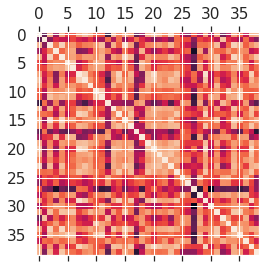

In [ ]:
plt.matshow(df_corr)

In [ ]:
# !pip install lxml
# !pip install html5lib
# !pip install bs4
# !pip install request

In [ ]:
 
import requests as req
web = req.get('https://www.infoplease.com/us/postal-information/state-abbreviations-and-state-postal-codes')
dfs = pd.read_html(web.text) 


In [ ]:
for df in dfs:
  print(df.head())

  State Name/District Postal Abbreviation Postal Code
0             Alabama                Ala.          AL
1              Alaska              Alaska          AK
2             Arizona               Ariz.          AZ
3            Arkansas                Ark.          AR
4          California              Calif.          CA
        Territory/Associate Abbreviation Postal Code
0            American Samoa          NaN          AS
1                      Guam         Guam          GU
2          Marshall Islands          NaN          MH
3                Micronesia          NaN          FM
4  Northern Mariana Islands          NaN          MP


In [ ]:
state_abbv = dfs[0]
state_abbv.head(3)
# state_abbv.to_csv('us_state.csv',index=False)
path1 = '/content/drive/MyDrive/3.0 Colab Project/1.0 Colab Playground/2.0 Python Script/Common_Usage/us_state_abbv.csv'
state_abbv = pd.read_csv(path1)

In [ ]:
state_abbv = state_abbv.set_index('State Name/District')
state_abbv

,Postal Abbreviation,Postal Code
State Name/District,,
Alabama,Ala.,AL
Alaska,Alaska,AK
Arizona,Ariz.,AZ
Arkansas,Ark.,AR
California,Calif.,CA
Colorado,Colo.,CO
Connecticut,Conn.,CT
Delaware,Del.,DE
District of Columbia,D.C.,DC


In [ ]:
state_dic = state_abbv[['Postal Code']].to_dict()

In [ ]:
state_dict = state_dic['Postal Code']
state_dict

{'Alabama': 'AL',
 'Alaska': 'AK',
 'Arizona': 'AZ',
 'Arkansas': 'AR',
 'California': 'CA',
 'Colorado': 'CO',
 'Connecticut': 'CT',
 'Delaware': 'DE',
 'District of Columbia': 'DC',
 'Florida': 'FL',
 'Georgia': 'GA',
 'Hawaii': 'HI',
 'Idaho': 'ID',
 'Illinois': 'IL',
 'Indiana': 'IN',
 'Iowa': 'IA',
 'Kansas': 'KS',
 'Kentucky': 'KY',
 'Louisiana': 'LA',
 'Maine': 'ME',
 'Maryland': 'MD',
 'Massachusetts': 'MA',
 'Michigan': 'MI',
 'Minnesota': 'MN',
 'Mississippi': 'MS',
 'Missouri': 'MO',
 'Montana': 'MT',
 'Nebraska': 'NE',
 'Nevada': 'NV',
 'New Hampshire': 'NH',
 'New Jersey': 'NJ',
 'New Mexico': 'NM',
 'New York': 'NY',
 'North Carolina': 'NC',
 'North Dakota': 'ND',
 'Ohio': 'OH',
 'Oklahoma': 'OK',
 'Oregon': 'OR',
 'Pennsylvania': 'PA',
 'Rhode Island': 'RI',
 'South Carolina': 'SC',
 'South Dakota': 'SD',
 'Tennessee': 'TN',
 'Texas': 'TX',
 'Utah': 'UT',
 'Vermont': 'VT',
 'Virginia': 'VA',
 'Washington': 'WA',
 'West Virginia': 'WV',
 'Wisconsin': 'WI',
 'Wyoming': 'WY

In [ ]:
labels = [state_dict[c] for c in df_corr.columns]

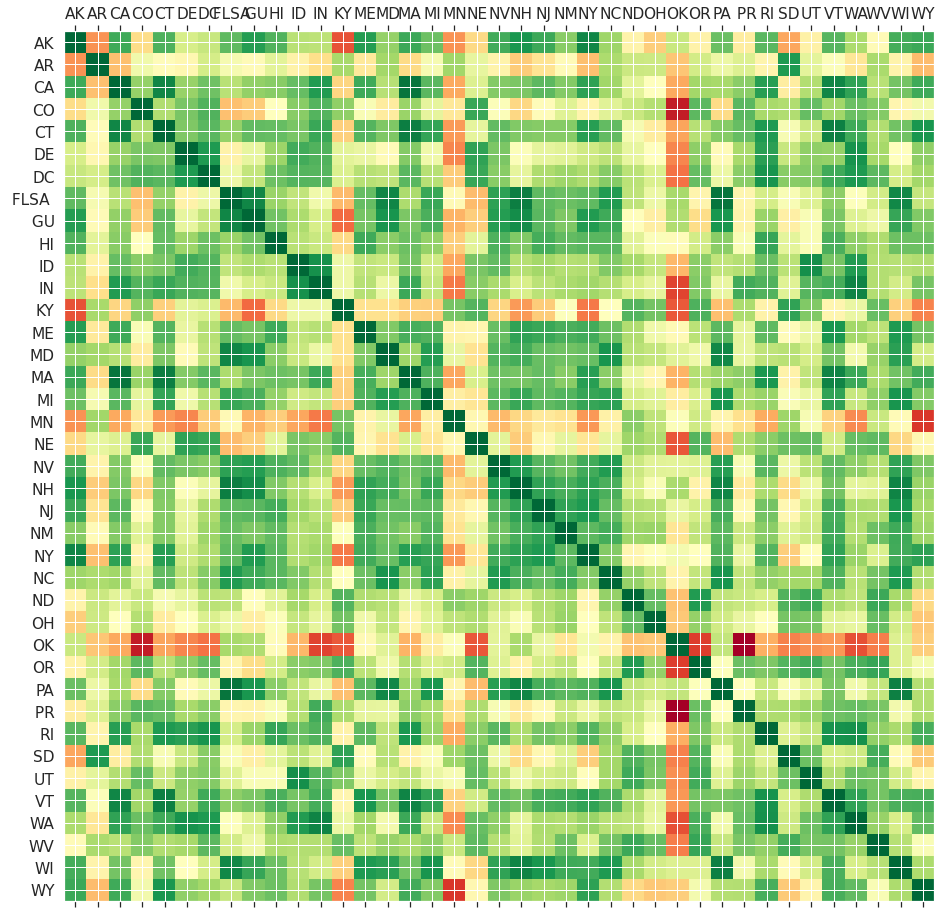

In [ ]:
labels = [state_dict[c] for c in df_corr.columns]
fig = plt.figure(figsize=(16,16))
ax = fig.add_subplot(111)
ax.matshow(df_corr, cmap=plt.cm.RdYlGn)

ax.set_yticks(np.arange(len(labels)))
ax.set_xticks(np.arange(len(labels)))
ax.set_yticklabels(labels)
ax.set_xticklabels(labels)
plt.show()